In [204]:
name = "Ira Kumpula"
id = 2426184

In [205]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_09_Signals.csv


In [206]:
# Run if needed
#!pip install numpy pandas matplotlib scipy

In [207]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [208]:
# Print the list of files in the ./data directory
os.listdir('./data')

['bidmc_02_Fix.txt',
 'bidmc_02_Signals.csv',
 'bidmc_03_Fix.txt',
 'bidmc_03_Signals.csv',
 'bidmc_04_Fix.txt',
 'bidmc_04_Signals.csv',
 'bidmc_06_Fix.txt',
 'bidmc_06_Signals.csv',
 'bidmc_08_Fix.txt',
 'bidmc_08_Signals.csv',
 'bidmc_09_Fix.txt',
 'bidmc_09_Signals.csv']

In [209]:
# Read the data
data = pd.read_csv(filename)

# Get PPG signal and create time vector
ppg = data[' PLETH']
ts = 0.008 # Sample time in seconds
fs = 1/ts # Sample rate (Hz), samples per second
t = np.arange(len(ppg))*ts

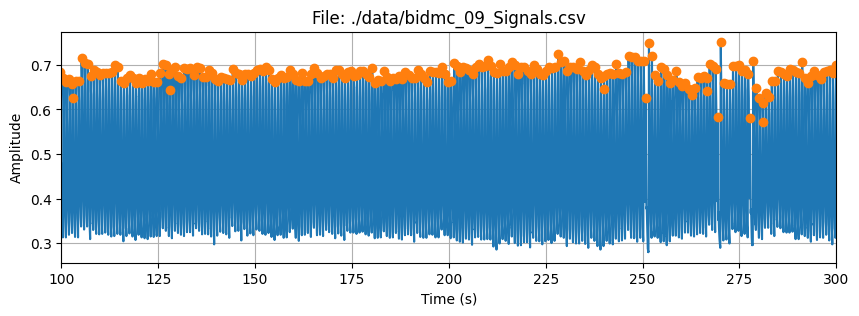

In [210]:
# Plot 180 seconds of the full signal (vaihdettu 30, 60)
peaks, properties = find_peaks(ppg, height = 0.5)

plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.plot(t[peaks], ppg[peaks], 'o')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(100, 300)
plt.grid()
plt.show()

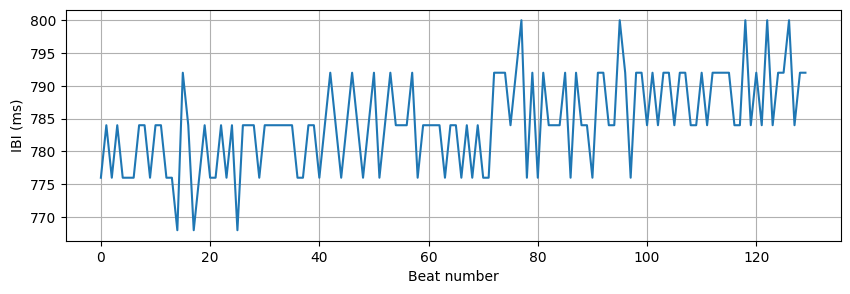

In [211]:
# Calculate the inter-beat intervals (IBI)
ppi = np.diff(peaks)*ts*1000 # in milliseconds

# Select the beats from 180 to 310
ppi = ppi[180:310]

# Plot the IBI
plt.figure(figsize = (10, 3))
plt.plot(ppi)
plt.xlabel('Beat number')
plt.ylabel('IBI (ms)')
plt.grid()
plt.show()

In [212]:
# Calculate the average IBI
mean_ppi = np.mean(ppi)
print(f'Mean IBI: {mean_ppi:.2f} ms')

# Calculate the heart rate
hr = 60000/mean_ppi
print(f'Heart rate: {hr:.2f} bpm')


Mean IBI: 784.49 ms
Heart rate: 76.48 bpm


In [213]:
# Continue coding here ...
# laske sykevälivaihtelu ja keskiarvo? ks. materiaalit. 1 vko aikaa tehtävälle (ylemmässä solussa laskettu), muita?

In [214]:
# Remember to add your interpretations ...